In [39]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [41]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 679 files belonging to 8 classes.


In [42]:
data_iterator = data.as_numpy_iterator()
#Get another batch from the iterator
batch = data_iterator.next()

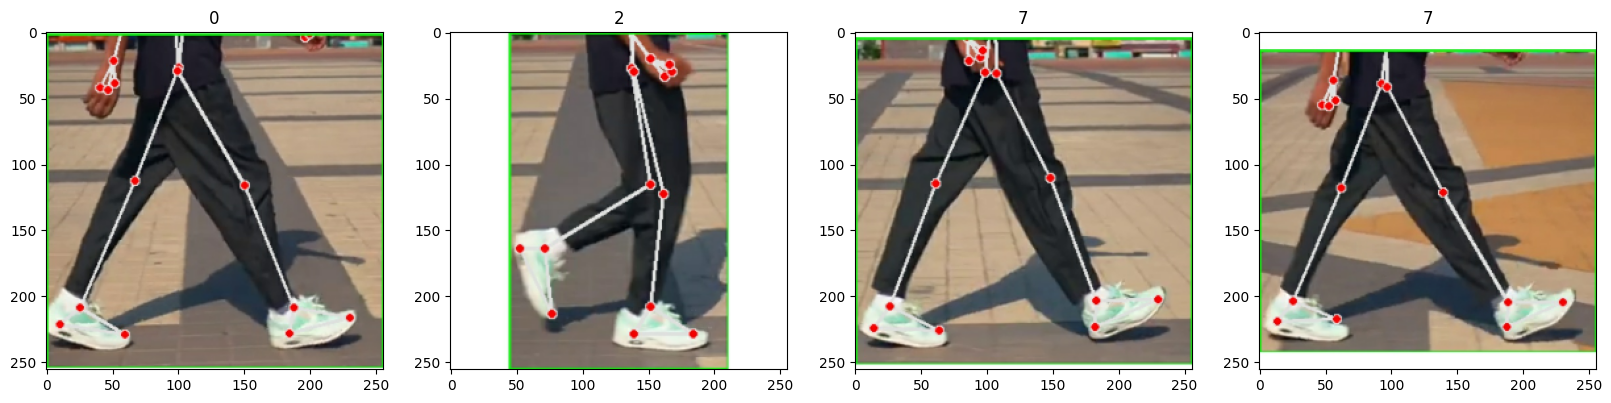

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [44]:
scaled = data.map(lambda x,y: (x/255, y))

In [45]:
scaled_iterator = scaled.as_numpy_iterator()

In [46]:
batch = scaled_iterator.next()

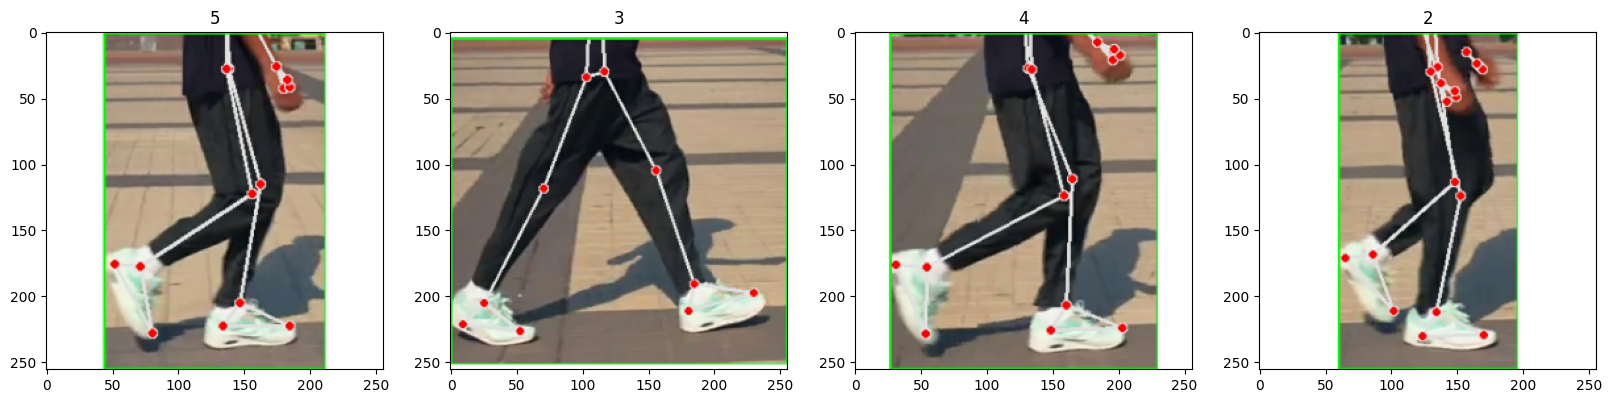

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [48]:
len(data)

22

In [49]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [50]:
train_size+val_size+test_size

23

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


15/15 [==============================] - 7s 318ms/step - loss: -258738.4531 - accuracy: 0.0896 - val_loss: -1155751.0000 - val_accuracy: 0.0875
Epoch 2/20
15/15 [==============================] - 5s 304ms/step - loss: -7889877.0000 - accuracy: 0.0938 - val_loss: -28543084.0000 - val_accuracy: 0.0750
Epoch 3/20
15/15 [==============================] - 5s 309ms/step - loss: -116331760.0000 - accuracy: 0.0958 - val_loss: -316725696.0000 - val_accuracy: 0.0875
Epoch 4/20
15/15 [==============================] - 5s 306ms/step - loss: -857284928.0000 - accuracy: 0.0812 - val_loss: -1922069760.0000 - val_accuracy: 0.0875
Epoch 5/20
15/15 [==============================] - 5s 312ms/step - loss: -4073385984.0000 - accuracy: 0.0917 - val_loss: -9083991040.0000 - val_accuracy: 0.1125
Epoch 6/20
15/15 [==============================] - 5s 302ms/step - loss: -15411104768.0000 - accuracy: 0.0938 - val_loss: -29595717632.0000 - val_accuracy: 0.0938
Epoch 7/20
15/15 [==============================] - 

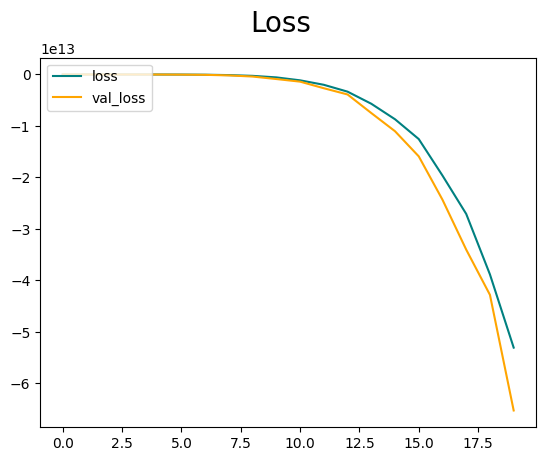

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

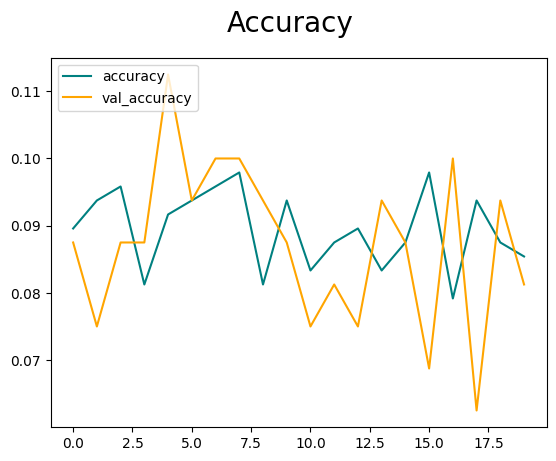

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 126ms/step


In [63]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.7692308 1.0 0.07692308


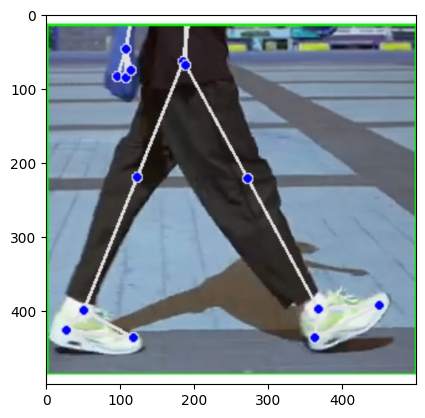

In [64]:
img = cv2.imread('../test1.jpg')
plt.imshow(img)
plt.show()

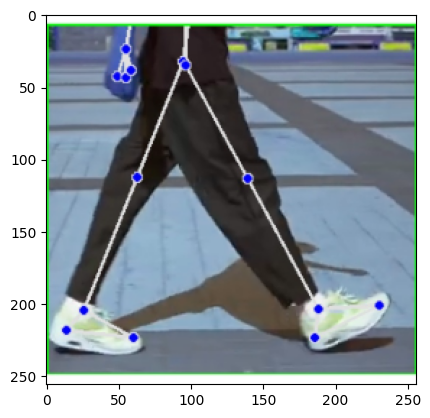

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [68]:
yhat

array([[1.]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
